<a href="https://colab.research.google.com/github/pySTEPS/ERAD-nowcasting-course-2022/blob/hands-on-users/hands-on-session-users/notebooks/block_02_input_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read, transform and visualize input data

In this example, we show how to use the utility functions for loading the sample datasets and plot the data by using the pysteps visualization tools.

Let's first run the previous notebook to install pysteps and configure it. This is needed because Colab notebooks are independent of each other and it's not possible to save the state of a notebook and use it in another one.

In [1]:
from google.colab import drive
import os
# mount the Google Drive folder
# don't attempt to remount if the drive is already mounted
if not os.path.exists("/content/mnt/MyDrive"):
  drive.mount("mnt")
%cd '/content/mnt/MyDrive/Colab Notebooks'
# run the previous notebook to configure the environment
%run block_01_setup.ipynb

Mounted at mnt
/content/mnt/MyDrive/Colab Notebooks
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pySTEPS/pysteps to /tmp/pip-req-build-a588b4ge
  Running command git clone -q https://github.com/pySTEPS/pysteps /tmp/pip-req-build-a588b4ge
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached jsmin-3.0.1-py3-none-any.whl
  Created wheel for pysteps: filename=pysteps-1.7.0-cp37-cp37m-linux_x86_64.whl size=1084380 sha256=78dcac4e2eb55c356b0893b485f3d82cbcf8a39ca6e28958f9c1c0c9c29eab84
  Stored in directory: /tmp/pip-ephem-wheel-cache-tlaalr5l/wheels/d5/d4/7a/a869ae35592de31860348dbbd52fa99ee22ec23546bfcc770f
Successfully built 

## Load the example dataset

Now that we have initialize the notebook, let's import the example MeteoSwiss dataset using the [load_dataset()](https://pysteps.readthedocs.io/en/latest/generated/pysteps.datasets.load_dataset.html) helper function from the `pysteps.datasets` module. The dataset contains radar-derived rain rates from Switzerland.

In [2]:
from pysteps.datasets import load_dataset
precip, metadata, timestep = load_dataset('mch')

Then we can print the metadata using [pprint](https://docs.python.org/3/library/pprint.html).

In [3]:
from pprint import pprint
pprint(metadata)

{'accutime': 5,
 'cartesian_unit': 'm',
 'institution': 'MeteoSwiss',
 'product': 'AQC',
 'projection': '+proj=somerc  +lon_0=7.43958333333333 +lat_0=46.9524055555556 '
               '+k_0=1 +x_0=600000 +y_0=200000 +ellps=bessel '
               '+towgs84=674.374,15.056,405.346,0,0,0,0 +units=m +no_defs',
 'threshold': 0.009909609120596347,
 'timestamps': array([datetime.datetime(2015, 5, 15, 15, 45),
       datetime.datetime(2015, 5, 15, 15, 50),
       datetime.datetime(2015, 5, 15, 15, 55),
       datetime.datetime(2015, 5, 15, 16, 0),
       datetime.datetime(2015, 5, 15, 16, 5),
       datetime.datetime(2015, 5, 15, 16, 10),
       datetime.datetime(2015, 5, 15, 16, 15),
       datetime.datetime(2015, 5, 15, 16, 20),
       datetime.datetime(2015, 5, 15, 16, 25),
       datetime.datetime(2015, 5, 15, 16, 30),
       datetime.datetime(2015, 5, 15, 16, 35),
       datetime.datetime(2015, 5, 15, 16, 40),
       datetime.datetime(2015, 5, 15, 16, 45),
       datetime.datetime(2015, 5

This should have printed the following key-value pairs:

*   `accutime`: accumulation time (minutes) for computing the quantity contained in the data
*   `cartesian_unit`: the distance unit of the geographical coordinates
*   `institution`: institution providing the data
*   `product`: name of the product
*   `projection`: PROJ-compatible projection definition
*   `threshold`: the minimum observed value
*   `timestamps`: list of timestamps, one for each element in the returned data array
*   `transform`: applied transformation to the data values (if any)
*   `unit`: the unit of the data
*   `x1`: x-coordinate of the lower-left corner of the domain in geographical coordinates
*   `x2`: x-coordinate of the upper-right corner of the domain in geographical coordinates
*   `xpixelsize`: pixel size in x-direction (meters)
*   `y1`: y-coordinate of the lower-left corner of the domain in geographical coordinates
*   `y2`: y-coordinate of the upper-right corner of the domain in geographical coordinates
*   `yorigin`: 'upper' or 'lower' depending on whether the origin of the coordinate system is in the lower-left or upper-left corner
*   `ypixelsize`: pixel size in y-direction (meters)
*   `zerovalue`: value corresponding to no precipitation
*   `zr_a`: the a-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)
*   `zr_b`: the b-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)


## Plot the data

Next we will use the [plot_precip_field](https://pysteps.readthedocs.io/en/stable/generated/pysteps.visualization.precipfields.plot_precip_field.html#pysteps.visualization.precipfields.plot_precip_field) function from the `pysteps.visualization.precipfields` module to plot the data. Here we plot the last element in the time series and take its timestamp from the metadata. The plotting is done for the three colormaps implemented in pysteps.

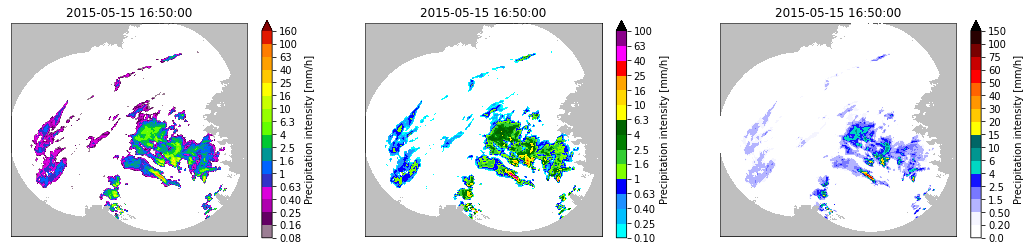

In [12]:
from pysteps.visualization import plot_precip_field
from matplotlib import pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(131)
plot_precip_field(precip[-1], geodata=metadata, title=metadata["timestamps"][-1], axis="off")
plt.subplot(132)
plot_precip_field(precip[-1], geodata=metadata, title=metadata["timestamps"][-1], axis="off", colorscale="STEPS-BE")
plt.subplot(133)
plot_precip_field(precip[-1], geodata=metadata, title=metadata["timestamps"][-1], axis="off", colorscale="BOM-RF3")

**TODO:** show how to plot lon-lat lines, tick labels and basemap

**TODO:** add examples of data transformations here